<a href="https://colab.research.google.com/github/rafavidal1709/projeto-aplicado-iii/blob/main/03B%20-%20Visualiza%C3%A7%C3%A3o%20de%20Dados%20Gr%C3%A1fico%20Barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json

with open("/content/03 - dataset_accuracy.json", 'r') as f:
    dataset = json.load(f)

In [3]:
accu = {}

for ds in dataset.keys():
  accu[ds] = {}
  for tech in dataset[ds]['accuracy'].keys():
    accu[ds][tech] = {}
    for model in dataset[ds]['accuracy'][tech].keys():
      print(f"{ds} - {tech} - {model}")
      accu[ds][tech][model] = {'mean' : dataset[ds]['accuracy'][tech][model]['mean'], 'mean_per_cat' : dataset[ds]['accuracy'][tech][model]['mean_per_cat']}

base - cosine_similarity - longformer_global_attention
base - cosine_similarity - longformer_output_mean
base - cosine_similarity - bert_pooler_output
base - cosine_similarity - bert_output_mean
base - cosine_similarity - bertimbau_pooler_output
base - cosine_similarity - bertimbau_output_mean
base - knn_euclidian - longformer_global_attention
base - knn_euclidian - longformer_output_mean
base - knn_euclidian - bert_pooler_output
base - knn_euclidian - bert_output_mean
base - knn_euclidian - bertimbau_pooler_output
base - knn_euclidian - bertimbau_output_mean
real - cosine_similarity - longformer_global_attention
real - cosine_similarity - longformer_output_mean
real - cosine_similarity - bert_pooler_output
real - cosine_similarity - bert_output_mean
real - cosine_similarity - bertimbau_pooler_output
real - cosine_similarity - bertimbau_output_mean
real - knn_euclidian - longformer_global_attention
real - knn_euclidian - longformer_output_mean
real - knn_euclidian - bert_pooler_output


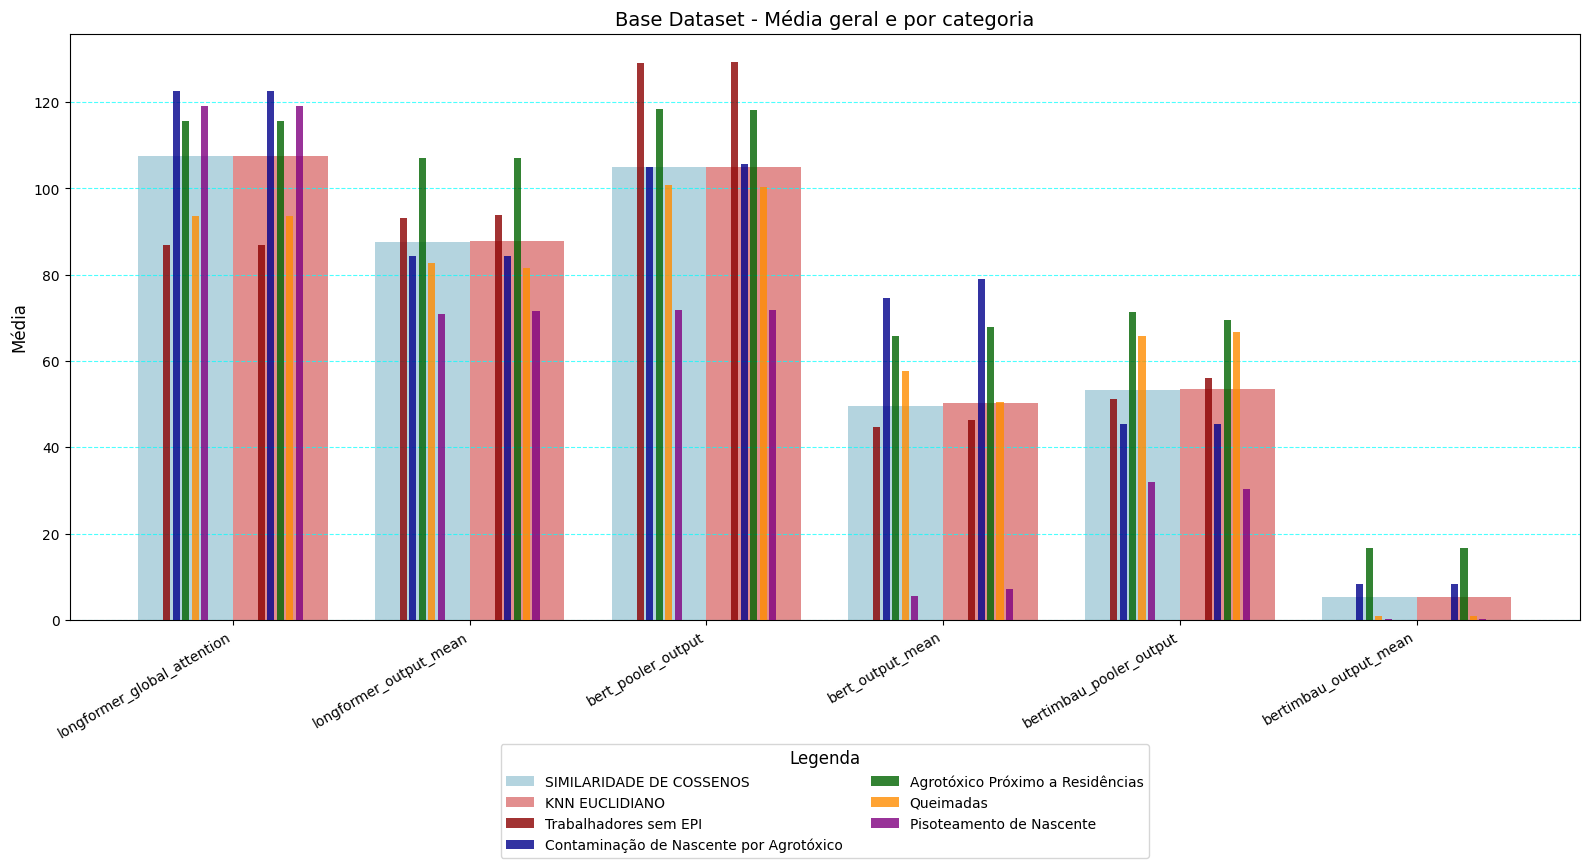

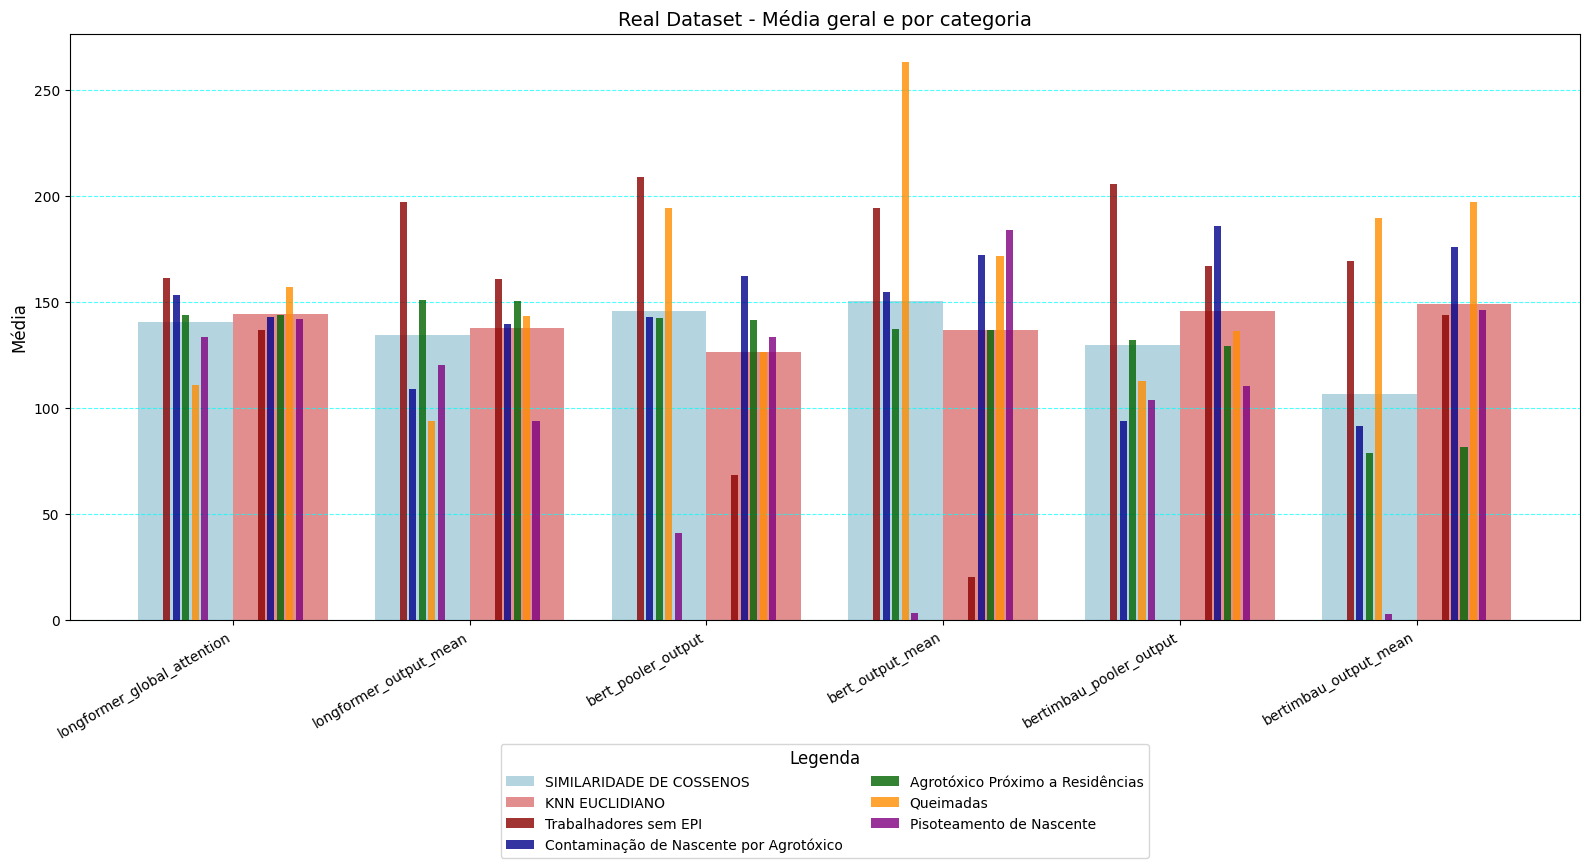

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process the input JSON and generate a DataFrame
def prepare_dataframe_from_accu(dataset):
    records = []
    for method, models in dataset.items():
        for model, values in models.items():
            mean = values["mean"]
            for category, value in values["mean_per_cat"].items():
                records.append({
                    "Method": method,
                    "Model": model,
                    "Mean": mean,
                    "Category": category,
                    "Value": value
                })
    df = pd.DataFrame(records)
    categories_order = [
        "longformer_global_attention", "longformer_output_mean",
        "bert_pooler_output", "bert_output_mean",
        "bertimbau_pooler_output", "bertimbau_output_mean"
    ]
    df["Model"] = pd.Categorical(df["Model"], categories=categories_order, ordered=True)
    return df.sort_values(["Method", "Model"])

# Function to plot the dataset
def plot_dataset_with_legend_and_labels(df, title):
    plt.figure(figsize=(16, 9))  # Increase figure size for clarity

    # Define category colors and names
    category_colors = ["darkred", "darkblue", "darkgreen", "darkorange", "purple"]
    category_names = [
        "Trabalhadores sem EPI",
        "Contaminação de Nascente por Agrotóxico",
        "Agrotóxico Próximo a Residências",
        "Queimadas",
        "Pisoteamento de Nascente"
    ]
    main_bar_colors = ["lightblue", "lightcoral"]
    method_labels = {"knn_euclidian": "KNN EUCLIDIANO", "cosine_similarity": "SIMILARIDADE DE COSSENOS"}

    # Plot main bars for mean
    sns.barplot(
        data=df,
        x="Model",
        y="Mean",
        hue="Method",
        errorbar=None,
        palette=main_bar_colors,
        dodge=True,
        hue_order=["cosine_similarity", "knn_euclidian"]
    )

    # Get unique models and methods for spacing
    models = df["Model"].unique()
    methods = df["Method"].unique()

    # Calculate the width of one group (main bar + fine bars)
    group_width = 0.8 / len(methods)  # Adjust for dodge

    # Plot fine bars for mean_per_cat
    for method_idx, method in enumerate(methods):
        for model_idx, model in enumerate(models):
            # Filter data for the specific method and model
            subset = df[(df["Model"] == model) & (df["Method"] == method)]
            x_base = model_idx - 0.4 + (method_idx * group_width) + group_width / 2
            for cat_idx, (_, row) in enumerate(subset.iterrows()):
                plt.bar(
                    x_base + (cat_idx * 0.04) - 0.08,  # Centering bars around main bar
                    row["Value"],
                    width=0.03,
                    color=category_colors[cat_idx],
                    edgecolor="none",
                    alpha=0.8,
                    linewidth=0,
                    zorder=3,
                    label=category_names[cat_idx] if model_idx == 0 and method_idx == 0 else None
                )

    # Update legend
    handles, _ = plt.gca().get_legend_handles_labels()
    legend_labels = [method_labels[m] for m in methods] + category_names
    plt.legend(
        handles=handles[:len(legend_labels)],
        labels=legend_labels,
        title="Legenda",
        loc="upper center",
        bbox_to_anchor=(0.5, -0.2),  # Move legend further down
        fontsize=10,
        ncol=2,  # Use two columns for better layout
        title_fontsize=12
    )

    # Update axis labels and angles
    plt.title(title, fontsize=14)
    plt.xlabel("")
    plt.ylabel("Média", fontsize=12)
    plt.xticks(rotation=30, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7, color="cyan")
    plt.tight_layout()
    plt.show()

# Updated plot function to accept the raw dataset (accu['base'] or accu['real'])
def plot_accu_dataset(dataset, title):
    df = prepare_dataframe_from_accu(dataset)
    plot_dataset_with_legend_and_labels(df, title)

accu_data = accu

plot_accu_dataset(accu_data["base"], "Base Dataset - Média geral e por categoria")
plot_accu_dataset(accu_data["real"], "Real Dataset - Média geral e por categoria")
